### 题目要求

>理论和实验证明，一个两层的ReLU网络可以模拟任何函数[1~5]。
>请自行定义一个函数, 并使用基于ReLU的神经网络来拟合此函数。

- 请自行在函数上采样生成训练集和测试集，使用训练集来训练神经网络，使用测试集来验证拟合效果。
- 可以使用深度学习框架来编写模型，如tensorflow、pytorch、keras等。
    - 如果不使用上述框架，直接用NumPy实现可以最高加5分的附加分。
- 提交时请一并提交代码和报告。
    - 代码建议注释清楚（5分）
    - 报告至少应包含以下部分：（5分）
    - 函数定义、数据采集、模型描述、拟合效果。

### 函数定义 & 数据采集

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以便结果可复现
np.random.seed(0)

def data_generation():
    # 在给定区间内采样点生成数据集
    x = np.linspace(-np.pi, np.pi / 2, 10000)
    y = np.exp(np.sin(x))
    return x, y

### 构建模型前向传播 & 后向传播修正参数

In [41]:
# 激活函数及其导数
def relu(x):
    return np.maximum(0, x)
def relu_derivative(x):
    return (x > 0).astype(float)

# 前向传播
def forward(x, w1, b1, w2, b2):
    z1 = np.dot(x, w1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, w2) + b2
    return z2

# 反向传播
def backward(x, y, w1, b1, w2, b2, lr):
    # 计算预测
    z1 = np.dot(x, w1) + b1 
    a1 = relu(z1)           # a1=ReLU(x*w1+b1)
    z2 = np.dot(a1, w2) + b2 # z2=a1*w2+b2

    dz2 = z2 - y
    dz1 = np.dot(dz2, w2.T) * relu_derivative(z1)

    dw2 = np.dot(a1.T, dz2) / len(x)            # w2=w2-(z2-y)*a1
    db2 = np.mean(dz2, axis=0, keepdims=True)   # b2=b2-(z2-y)
    dw1 = np.dot(x.T, dz1) / len(x)             # w1=w1-(z2-y)*x
    db1 = np.mean(dz1, axis=0, keepdims=True)
    
    predition = np.dot(np.dot(x, w1)+b1, w2) + b2
    # 更新参数
    w1 -= lr * dw1
    b1 -= lr * db1
    w2 -= lr * dw2
    b2 -= lr * db2

    return w1, b1, w2, b2


### 训练 & 测试

In [42]:
# 输入x_train, y_train，参数，学习率，学习代数
def train(x, y, w1, b1, w2, b2, lr, epochs):
    for epoch in range(epochs):
        # 反向传播修正参数
        w1, b1, w2, b2 = backward(x, y, w1, b1, w2, b2, lr)
        if epoch % 100 == 0:
            # 汇报损失情况
            loss = np.mean((y - forward(x, w1, b1, w2, b2))**2)
            print('Epoch:', epoch, 'Loss:', loss)
    return w1, b1,w2, b2

def test(x, y, w1, b1, w2, b2):
    # 预测
    y_pred = forward(x, w1, b1, w2, b2)
    mse = np.mean((y - y_pred)**2)
    print('Test MSE:', mse)
    return mse


### 整合 & 展现拟合效果

Epoch: 0 Loss: 4.113134302818273
Epoch: 100 Loss: 0.00864406195294849
Epoch: 200 Loss: 0.007493392777553231
Epoch: 300 Loss: 0.006949236371253506
Epoch: 400 Loss: 0.006616560753123092
Epoch: 500 Loss: 0.006364528580152618
Epoch: 600 Loss: 0.006143942591476318
Epoch: 700 Loss: 0.00593256679848217
Epoch: 800 Loss: 0.005717987897794428
Epoch: 900 Loss: 0.005490926659912666
Epoch: 1000 Loss: 0.005241117449632139
Epoch: 1100 Loss: 0.004960773672299196
Epoch: 1200 Loss: 0.0046580382569112715
Epoch: 1300 Loss: 0.004351213825709704
Epoch: 1400 Loss: 0.004060396853397054
Epoch: 1500 Loss: 0.0038003463482902036
Epoch: 1600 Loss: 0.0035777607200984745
Epoch: 1700 Loss: 0.0033925473258552955
Epoch: 1800 Loss: 0.00324063734250754
Epoch: 1900 Loss: 0.003116398912438804
Epoch: 2000 Loss: 0.003014105855117631
Epoch: 2100 Loss: 0.002928645824509698
Epoch: 2200 Loss: 0.0028558280842446502
Epoch: 2300 Loss: 0.0027923877235019484
Epoch: 2400 Loss: 0.002735899897380698
Epoch: 2500 Loss: 0.00268461514601156

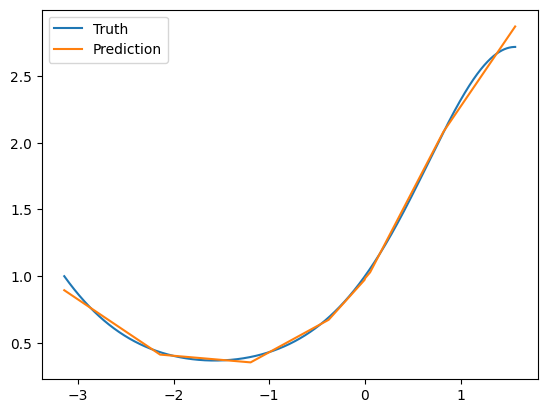

In [43]:
if __name__ == '__main__':
    x, y = data_generation()

    # 将x和y转换为二维数组
    x = x.reshape(-1, 1)
    y = y.reshape(-1, 1)

    # 初始化参数
    w1 = np.random.randn(1, 10)
    b1 = np.zeros((1, 10))
    w2 = np.random.randn(10, 1)
    b2 = np.zeros((1, 1))

    # 训练&测试
    w1, b1, w2, b2 = train(x, y, w1, b1, w2, b2, lr=0.03, epochs=10000)
    test(x, y, w1, b1, w2, b2)

    # 绘制图像
    plt.plot(x, y, label='Truth')
    plt.plot(x, forward(x, w1, b1, w2, b2), label='Prediction')
    plt.legend()
    plt.show()
    